In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import string
import seaborn as sns
import string

In [18]:
# pip install nltk, textblob
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob

- extroversion vs. introversion 
- intuition vs. sensing
- thinking vs. feeling
- judging vs. perceiving

In [3]:
# Load Data
mbti = pd.read_csv('data/mbti_1.csv') 

In [4]:
mbti.head()

type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...

In [ ]:
## General Cleaning copied from Ben's notebook

In [5]:
# remove ||| 
user_posts = [re.sub(r'\|\|\|',' ',posts) for posts in mbti['posts']]
# Remove all links 
linkless_posts = [re.sub(r'http[\S]* ','',posts) for posts in user_posts]
# Update mbti 
mbti['posts'] = linkless_posts

In [6]:
# glance at the distribution of personality types
mbti['type'].value_counts()  #most common personality: INFP

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [7]:
# analyze types by sub-category may be easier
mbti['EorI']= mbti['type'].apply(lambda x:x[0])
mbti['NorS']= mbti['type'].apply(lambda x:x[1])
mbti['TorF']= mbti['type'].apply(lambda x:x[2])
mbti['JorP']= mbti['type'].apply(lambda x:x[3])

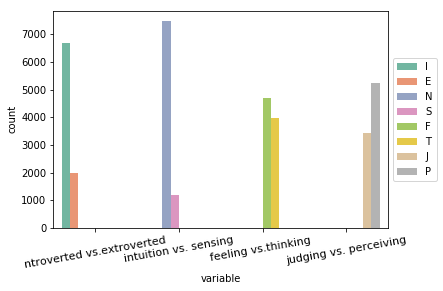

In [10]:
ax = sns.countplot(x='variable',hue='value',data=pd.melt(mbti.iloc[:,2:]),palette="Set2")
ax.set_xticklabels(["ntroverted vs.extroverted", "intuition vs. sensing", 
                    "feeling vs.thinking ", "judging vs. perceiving", 
                    ], rotation=10, fontsize=11)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


#### Notes:
imbalanced class: I vs E, N vs S. Some advanced techniques like resampling methods may be needed later to handle imbalanced classes

## Workflow

- Delect delete punctuations 

### Basic feature extraction using text data
- Number of words
- Number of characters
- Number of stopwords
- Number of special characters
- Number of numerics
- Number of uppercase words

More:
- Average Word Length, will do after tokenization

### Basic Text Pre-processing of text data
- Lower casing
- Punctuation removal
- Stopwords removal
- Frequent words removal
- Rare words removal
- Spelling correction
- Tokenization
- Stemming

### Maybe More Text Processing

- N-grams
- Term Frequency
- Inverse Document Frequency
- Term Frequency-Inverse Document Frequency (TF-IDF)
- Bag of Words
- Sentiment Analysis
- Word Embedding



#### 1. Number of Words

In [14]:
# before pre-process, extract some features 
# include all numbers,stop words, emojis,

# delete punctuations
def del_punct(text):
    regex = re.compile('[' + re.escape(string.punctuation) + '\\r\\t\\n]')
    return regex.sub("", text) 
mbti['post_np'] = mbti['posts'].apply(lambda x: del_punct(x))

# number of words after deleting all punctuatuins
mbti['word_count'] = mbti['posts'].apply(lambda x: len(x.split(" ")))

In [15]:
mbti.head()

type                                              posts EorI NorS TorF  \
0  INFJ  'enfp and intj moments   sportscenter not top ...    I    N    F   
1  ENTP  'I'm finding the lack of me in these posts ver...    E    N    T   
2  INTP  'Good one  _____   Of course, to which I say I...    I    N    T   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...    I    N    T   
4  ENTJ  'You're fired. That's another silly misconcept...    E    N    T   

  JorP                                            post_np  word_count  \
0    J  enfp and intj moments   sportscenter not top t...         603   
1    P  Im finding the lack of me in these posts very ...        1234   
2    P  Good one     Of course to which I say I know t...         914   
3    J  Dear INTP   I enjoyed our conversation the oth...        1148   
4    J  Youre fired Thats another silly misconception ...        1030   

   char_count  
0        3160  
1        6063  
2        4769  
3        5791  
4        5394

#### 2. Number of "Character"

In [16]:
mbti['char_count'] = mbti['post_np'].str.len()  # this also includes numbers,stop words, punctuations, emojis,

#### 3. Number of stopwords

In [19]:
# nltk.download('stopwords')
stop = stopwords.words('english')
# used posts here instead of non-punct posts 
mbti['stopwords'] = mbti['post_np'].apply(lambda x: len([x for x in x.split() if x in stop]))

#### 4. Number of special characters

In [20]:
# the number of emoji: collect special chars that are commonly used for emoji:)(


#### 5. Number of numerics

In [21]:
mbti['numerics'] = mbti['post_np'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

#### 6. Number of Uppercase words

In [22]:
mbti['upper'] = mbti['post_np'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
mbti.head()

type                                              posts EorI NorS TorF  \
0  INFJ  'enfp and intj moments   sportscenter not top ...    I    N    F   
1  ENTP  'I'm finding the lack of me in these posts ver...    E    N    T   
2  INTP  'Good one  _____   Of course, to which I say I...    I    N    T   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...    I    N    T   
4  ENTJ  'You're fired. That's another silly misconcept...    E    N    T   

  JorP                                            post_np  word_count  \
0    J  enfp and intj moments   sportscenter not top t...         603   
1    P  Im finding the lack of me in these posts very ...        1234   
2    P  Good one     Of course to which I say I know t...         914   
3    J  Dear INTP   I enjoyed our conversation the oth...        1148   
4    J  Youre fired Thats another silly misconception ...        1030   

   char_count  stopwords  numerics  upper  
0        3160        236         8     17  
1        6063        474         3     91  
2        4769        328        17     37  
3        5791        454        13     69  
4        5394        423         2     51

### Basic Processing

#### 1. Convert to lower Case

In [26]:
mbti_clean = mbti.copy() # DF to be cleaned
mbti_clean.drop(columns=['posts','post_np'],inplace=True)
mbti_clean['posts']= mbti['post_np'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#### 2. Remove stop words

In [27]:
stop = stopwords.words('english')
mbti_clean['posts'] = mbti['post_np'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
mbti_clean.head()

type EorI NorS TorF JorP  word_count  char_count  stopwords  numerics  \
0  INFJ    I    N    F    J         603        3160        236         8   
1  ENTP    E    N    T    P        1234        6063        474         3   
2  INTP    I    N    T    P         914        4769        328        17   
3  INTJ    I    N    T    J        1148        5791        454        13   
4  ENTJ    E    N    T    J        1030        5394        423         2   

   upper                                              posts  
0     17  enfp intj moments sportscenter top ten plays p...  
1     91  Im finding lack posts alarming Sex boring posi...  
2     37  Good one Of course I say I know thats blessing...  
3     69  Dear INTP I enjoyed conversation day Esoteric ...  
4     51  Youre fired Thats another silly misconception ...

#### *back to FE: Avg Length of words

In [28]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

mbti_clean['avg_word'] = mbti_clean['posts'].apply(lambda x: avg_word(x))
mbti_clean.head()

type EorI NorS TorF JorP  word_count  char_count  stopwords  numerics  \
0  INFJ    I    N    F    J         603        3160        236         8   
1  ENTP    E    N    T    P        1234        6063        474         3   
2  INTP    I    N    T    P         914        4769        328        17   
3  INTJ    I    N    T    J        1148        5791        454        13   
4  ENTJ    E    N    T    J        1030        5394        423         2   

   upper                                              posts  avg_word  
0     17  enfp intj moments sportscenter top ten plays p...  5.454810  
1     91  Im finding lack posts alarming Sex boring posi...  4.761708  
2     37  Good one Of course I say I know thats blessing...  5.363806  
3     69  Dear INTP I enjoyed conversation day Esoteric ...  5.079268  
4     51  Youre fired Thats another silly misconception ...  5.332192

#### 3. Remove common words

In [29]:
# common words means their presence will not of any use in classification of our text data.
freq = pd.Series(' '.join(mbti_clean['posts']).split()).value_counts()[:10]

In [30]:
freq = list(freq.index)
mbti_clean['posts'] = mbti_clean['posts'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
# mbti_clean['posts'].head()

#### 4. Remove rare words

In [31]:
# rare words means because they’re so rare, the association between them and other words is dominated by noise. 
freq_l = pd.Series(' '.join(mbti_clean['posts']).split()).value_counts()[-10:]
freq_l = list(freq_l.index)
mbti_clean['posts'] = mbti_clean['posts'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_l))

In [32]:
#### 5. Correct spelling

In [33]:
# from textblob import TextBlob
mbti_clean['posts'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    end into moments sportscenter top ten plays pr...
1    finding lack posts alarming Ex boring position...
2    Good Of course say that blessing curse Does ab...
3    Dear INTP enjoyed conversation day Esoteric ga...
4    More fired Hats another silly misconception Th...
Name: posts, dtype: object

In [ ]:
# b/c: because: need to convert b/c and other abbreviations to words
# why there is many many Dear ENFP, Dear ENFJ... in the post